In [1]:
from google.colab import drive
from os.path import join 

ROOT = "/content/gdrive/"
drive.mount(ROOT)

Mounted at /content/gdrive/


## 해당 파일에서 하는 것 : pClassToFileName.pickle, pFileNamesToClass.pickle, fileName.csv, croppedImg 생성 

## Exploratory Data Analysis 학습 데이터 파악

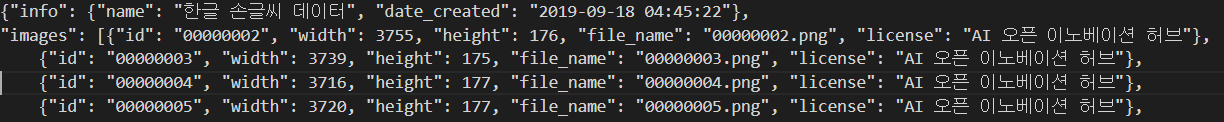

### 손글씨 데이터 파악

In [ ]:
# 손글씨 데이터에서 필요한 것들 (for GAN) 
# text(클래스) : json_data['annotations'][idx]['text']
# 성별, 연령대 : json_data['annotations'][idx]['attributes']  for pretraining - 잘 쓴 손글씨(여성) => 나중에 보니까 다 여성임 -> 나눌 필요 없다.
# 이미지 크기 : json_data['images'][idx]['width'] 또는 ['height']
# 파일명 : json_data['images'][idx]['file_name']
import json

In [ ]:
def getListOfHandWritingFileNames(listOfFemaleHandWritingFileNames, listOfMaleHandWritingFileNames):
    handwritingMetaFile_location = '/content/gdrive/Shareddrives/machine_learning_in_practice/한국어 글자체 이미지/01.손글씨/handwriting_data_info1.json'
    printedMetaFile_location = '/content/gdrive/Shareddrives/machine_learning_in_practice/한국어 글자체 이미지/02.인쇄체/printed_data_info.json'

    with open(handwritingMetaFile_location, 'r') as f:
        hw_json_data = json.load(f)

    hw_ClassToFileNames, hw_WordsToFileNames= {}, {}
    hw_syllableDataLength = 0

    for idx, img_data in enumerate(hw_json_data['images']):
        # idx 번째 이미지 데이터들에 대해 {클래스 : [파일명, 파일명, ...]}
        class_ = hw_json_data['annotations'][idx]['text']
        fileName = hw_json_data['images'][idx]['file_name']
        if len(class_) == 1:    
            # 한 글자인 경우만 ClassToFileNames에 넣기
            if class_ not in hw_ClassToFileNames.keys(): # idx번째 이미지의 클래스가 새로운 클래스이면
                hw_ClassToFileNames[class_] = [] # 빈 리스트 생성
            hw_ClassToFileNames[class_].append(fileName)
            hw_syllableDataLength += 1
            if hw_json_data['annotations'][1]['attributes']['gender'] == '여':
                listOfFemaleHandWritingFileNames.append(fileName)
            else:
                listOfMaleHandWritingFileNames.append(fileName)
        else:
            # 단어, 문장의 경우 WordsToFileNames에 넣기
            if class_ not in hw_WordsToFileNames.keys(): # idx번째 이미지의 클래스가 새로운 클래스이면
                hw_WordsToFileNames[class_] = [] # 빈 리스트 생성
            hw_WordsToFileNames[class_].append(fileName)
    
    print("*** Handwriting Data Description ***")
    print("\t전체 데이터 수 : ", len(hw_json_data['images']) )# 여기에는 문장 데이터, 단어 데이터, 음절 데이터 모두 포함됨
    print("\t음절 클래스 수 : ", len(hw_ClassToFileNames) ) # 한국어 글자 종류는 11,172가지.
    print("\t단어/문장 클래스 수: ", len(hw_WordsToFileNames))
    print("\t음절 데이터 수 : ", hw_syllableDataLength)
    print("\t단어/문장 데이터 수 : ", len(hw_json_data['images']) - hw_syllableDataLength)
    print(f"\t한 음절 당 평균 {hw_syllableDataLength/len(hw_ClassToFileNames)} 개 손글씨 데이터 존재함")

### 인쇄체 데이터 파악

In [ ]:
import json
def getListOfPrintedFileNames(listOfPrintedFileNames):
    printedMetaFile_location = '/content/gdrive/Shareddrives/machine_learning_in_practice/한국어 글자체 이미지/02.인쇄체/printed_data_info.json'

    with open(printedMetaFile_location, 'r') as f:
        p_json_data = json.load(f)

    p_ClassToFileNames, p_WordsToFileNames= {}, {}
    p_FIleNameToClass = {} # 파일명 : json_data['images'][idx]['file_name']
    p_syllableDataLength = 0

    for idx, img_data in enumerate(p_json_data['images']):
        # idx 번째 이미지 데이터들에 대해 {클래스 : [파일명, 파일명, ...]}
        class_ = p_json_data['annotations'][idx]['text']
        fileName = p_json_data['images'][idx]['file_name']
        if len(class_) == 1:    
            # 한 글자인 경우만 ClassToFileNames에 넣기
            if class_ not in p_ClassToFileNames.keys(): # idx번째 이미지의 클래스가 새로운 클래스이면
                p_ClassToFileNames[class_] = [] # 빈 리스트 생성
            p_ClassToFileNames[class_].append(fileName)
            p_syllableDataLength += 1
            listOfPrintedFileNames.append(fileName)

        else:
            # 단어, 문장의 경우 WordsToFileNames에 넣기
            if class_ not in p_WordsToFileNames.keys(): # idx번째 이미지의 클래스가 새로운 클래스이면
                p_WordsToFileNames[class_] = [] # 빈 리스트 생성
            p_WordsToFileNames[class_].append(fileName)
    for idx, img_data in enumerate(p_json_data['images']):
        fileName = p_json_data['images'][idx]['file_name']
        class_ = p_json_data['annotations'][idx]['text']
        p_FIleNameToClass[fileName] = class_

    print("*** Printed Data Description ***")
    print("\t전체 데이터 수 : ", len(p_json_data['images']) )# 여기에는 문장 데이터, 단어 데이터, 음절 데이터 모두 포함됨
    print("\t음절 클래스 수 : ", len(p_ClassToFileNames) ) # 한국어 글자 종류는 11,172가지.
    print("\t단어/문장 클래스 수: ", len(p_WordsToFileNames))
    print("\t음절 데이터 수 : ", p_syllableDataLength)
    print("\t단어/문장 데이터 수 : ", len(p_json_data['images']) - p_syllableDataLength)
    print(f"\t한 음절 당 평균 {p_syllableDataLength/len(p_ClassToFileNames)} 개 손글씨 데이터 존재함")

    return p_ClassToFileNames, p_FIleNameToClass

## 인쇄체 데이터 파싱

In [ ]:
# 인쇄체 음절 이미지의 파일명  for pretrain
listOfPrintedFileNames = []
# 여성 필기체 음절 이미지의 파일명  for pretrain
listOfFemaleHandWritingFileNames = []
# 남성 필기체 음절 이미지의 파일명  for train
listOfMaleHandWritingFileNames = []

# getListOfHandWritingFileNames(listOfFemaleHandWritingFileNames, listOfMaleHandWritingFileNames)
p_ClassToFileNames, p_FIleNameToClass = getListOfPrintedFileNames(listOfPrintedFileNames)

#print("여성 필기체 data 수 : ", len(listOfFemaleHandWritingFileNames))
#print("남성 필기체 data 수 : ", len(listOfMaleHandWritingFileNames))
print("인쇄체 data 수 : ", len(listOfPrintedFileNames))

*** Printed Data Description ***
	전체 데이터 수 :  878100
	음절 클래스 수 :  11172
	단어/문장 클래스 수:  6054
	음절 데이터 수 :  575350
	단어/문장 데이터 수 :  302750
	한 음절 당 평균 51.499283924095955 개 손글씨 데이터 존재함
인쇄체 data 수 :  575350


#### claassToFileName.pickle ( 자주 사용하는 한국어 + 어려운거 몇 개만 class로) 

In [ ]:
import pandas as pd

classFile = '/content/gdrive/Shareddrives/machine_learning_in_practice/Analog-PILGI-to-DIgital/GAN/data/한국어 학습용 어휘 목록.xls'
df = pd.read_excel(classFile)

df.head()

,순위,단어,품사,풀이,등급
0,1195.0,가게,명,NaN,A
1,898.0,가격03,명,價格,B
2,2986.0,가구03,명,家口,C
3,7434.0,가구04,명,家具,B
4,4964.0,가까워지다,동,NaN,B


In [ ]:
word_list = df["단어"].tolist()
# word_list 수정,  '가구04', '도쿄(동경)' 가공
for idx, word in enumerate(word_list):
    if len(word) > 2:
        if word[-2] in ('0', '1', '2', '3'):
            word_list[idx] = word[:-2]
    if word[-1] == ')':
        del word_list[idx]
        
len(word_list)

5963

In [ ]:
syllable_set = set()
for word in word_list:
    for syllable in word:
        syllable_set.add(syllable)
len(syllable_set)

dump_set = {'0', '1', '8'}

easy_syllable_set = syllable_set - dump_set
len(easy_syllable_set)

971

In [ ]:
whole_syllable_set = set(p_ClassToFileNames.keys())
len(whole_syllable_set)

11172

In [ ]:
difficult_syllable_set = whole_syllable_set - easy_syllable_set
len(difficult_syllable_set)

10201

In [ ]:
import random

difficult_syllable_list = list(difficult_syllable_set)
classList = []

randIdx = random.randint(0, len(difficult_syllable_set))

difficult_syllable_choice = set()

for i in range(976):
    randIdx = random.randint(0, len(difficult_syllable_set))
    difficult_syllable_choice.add(randIdx)
len(difficult_syllable_choice)

idxs = list(difficult_syllable_choice)


difficult_syllable_classes = set()
for idx in idxs:
    difficult_syllable_classes.add(difficult_syllable_list[idx])
len(difficult_syllable_classes)

940

In [ ]:
newClassToFileNames = {}
for syllable in difficult_syllable_classes:
    newClassToFileNames[syllable] = p_ClassToFileNames[syllable]

for syllable in easy_syllable_set:
    newClassToFileNames[syllable] = p_ClassToFileNames[syllable]

print("잘 쓰는 글자(971) : ", easy_syllable_set) # 국립국어연구원에서 2003년 5월에 발표한 한국어 학습용 어휘 목록에서 따옴
print("잘 안쓴느 글자(932) : ", difficult_syllable_classes) # 위의 꺼의 여집합 중 일부 ( 비율 거의 동일하게 함)
print("잘 쓰는 글자(971)와 잘 안쓰는 글자(932) 총 클래스 : ", len(newClassToFileNames))

잘 쓰는 글자(971) :  {'데', '듭', '춘', '랜', '꺾', '깨', '링', '섹', '낳', '밀', '친', '득', '섞', '참', '씨', '볕', '여', '거', '팎', '장', '셈', '젊', '궁', '찢', '게', '비', '봄', '맨', '특', '짙', '웨', '은', '퇴', '멸', '증', '짓', '땀', '묶', '크', '텔', '린', '혜', '향', '안', '을', '웬', '럼', '빔', '숫', '킬', '까', '때', '씬', '깝', '곱', '씻', '망', '층', '편', '릭', '표', '깍', '조', '겨', '외', '예', '쉽', '엉', '와', '셔', '좀', '엿', '광', '멩', '있', '머', '음', '썰', '므', '탈', '꽤', '동', '켓', '녀', '용', '불', '곁', '샌', '붉', '봇', '케', '멘', '팬', '걸', '릎', '묵', '옥', '템', '흘', '렁', '녁', '걔', '닥', '키', '놀', '축', '댁', '빼', '덟', '쇄', '돼', '석', '보', '솜', '러', '뻐', '자', '퓨', '산', '쓴', '픽', '젠', '림', '떤', '샤', '남', '걷', '벼', '해', '맑', '둠', '슷', '빗', '흐', '랗', '뜯', '뒤', '천', '리', '겁', '되', '판', '것', '양', '괴', '얹', '령', '꾸', '이', '옆', '회', '복', '뉴', '톤', '튿', '부', '덤', '뀌', '포', '간', '댓', '위', '념', '끗', '닐', '슬', '받', '담', '입', '쾌', '욕', '세', '귤', '닿', '얼', '짐', '즈', '강', '매', '잎', '너', '측', '딪', '쉬', '관', '쳐', '굉', '눈', '약', '맞', '새', '껏', '나', '쌍', '컷', '듣', '몸'

In [ ]:
with open('/content/gdrive/Shareddrives/machine_learning_in_practice/Analog-PILGI-to-DIgital/GAN/data/pClassToFileNames.pickle', 'wb') as fw:
    pickle.dump(newClassToFileNames, fw)

#### FileNameToClass.pickle - key를 한정 (기존 FileNameToClass는 11172개의 class 모두 담고 있음 => 1903개 클래스로 축소)

In [ ]:
classes = newClassToFileNames.keys()
new_pFileNameToClass = dict()
for fileName in p_FIleNameToClass.keys():
    if p_FIleNameToClass[fileName] not in classes:
        continue
    new_pFileNameToClass[fileName] = p_FIleNameToClass[fileName]

print("클래스 축소 전 데이터 수 : ", len(p_FIleNameToClass))
print("클래스 축소 후 데이터 수 : ", len(new_pFileNameToClass)) # 줄여도 엄청 많네...

클래스 축소 전 데이터 수 :  878100
클래스 축소 후 데이터 수 :  112300


In [ ]:
import numpy as np
new_pFileNameToClass.keys()
class_list = []
for key in new_pFileNameToClass:
    class_ = new_pFileNameToClass[key]
    class_list.append(class_)
print(len(new_pFileNameToClass))
np.array(class_list)
unique = np.unique(class_list)
for class_ in unique:
    print(class_)

112300
가
각
간
갇
갈
갊
갍
감
갑
값
갓
강
갖
같
갚
갛
개
객
갳
갴
갿
걀
걔
걜
걤
걪
거
걱
건
걷
걸
걾
검
겁
것
겈
겉
게
겑
겖
겡
겥
겦
겨
격
겪
견
결
겸
겹
겻
경
곁
계
곋
곖
곚
고
곡
곤
곧
골
곬
곰
곱
곳
공
곺
곻
과
관
괆
괍
광
괜
괴
괶
굁
굅
굉
교
굝
굩
구
국
군
굱
굳
굴
굵
굶
굽
궁
권
궚
궯
귀
귅
귍
귑
귓
규
균
귤
그
극
근
귽
글
긁
긇
금
급
긋
긍
긏
긕
긞
긨
긩
긪
긭
기
긴
길
긿
김
깂
깃
깅
깊
깋
까
깍
깎
깐
깔
깜
깝
깡
깥
깨
깫
깮
깴
꺈
꺰
꺼
꺾
껉
껊
껌
껍
껏
껑
껓
께
껠
껤
껨
껪
껴
껻
꼅
꼌
꼍
꼎
꼒
꼡
꼦
꼪
꼬
꼭
꼴
꼶
꼼
꼽
꼿
꽂
꽃
꽆
꽇
꽉
꽌
꽞
꽟
꽤
꽨
꽫
꽳
꽵
꽻
꾃
꾇
꾗
꾜
꾟
꾡
꾸
꾼
꿀
꿈
꿸
꿾
뀀
뀇
뀊
뀌
뀎
뀨
뀰
끄
끈
끊
끌
끏
끓
끔
끗
끝
끫
끰
끳
끹
끻
끼
낁
낇
낌
낓
나
낙
낚
난
낞
날
낡
남
납
낫
낭
낮
낯
낰
낱
낳
내
낽
냁
냄
냇
냉
냊
냋
냐
냡
냥
냩
냲
냸
넂
너
넉
넌
널
넓
넘
넛
넞
넣
네
넥
넷
녀
녁
년
녌
념
녕
녟
녡
녣
녭
녷
노
녹
논
놀
놁
놇
놈
놉
놋
놌
농
높
놓
놔
놗
놝
놣
놹
놼
놽
뇆
뇈
뇌
뇎
뇏
뇞
뇣
뇨
눁
누
눈
눊
눎
눕
눢
뉄
뉐
뉘
뉡
뉴
뉺
뉻
늀
늂
늄
늈
느
늑
는
늘
늙
능
늦
늩
늬
늮
늻
니
닐
닒
님
닟
다
닥
닦
단
닫
달
닭
닮
닯
닲
담
답
닷
당
닿
대
댁
댉
댌
댍
댐
댓
댖
댥
댮
댶
더
덕
던
덜
덟
덤
덥
덧
덩
덮
데
델
뎂
뎐
뎝
뎣
뎧
도
독
돈
돌
돍
돕
돗
동
돨
돩
돵
돼
됁
됏
됖
되
된
됞
됪
됵
됷
둉
둍
둎
둏
두
둑
둓
둘
둠
둡
둥
둦
둨
뒃
뒊
뒑
뒤
뒧
뒲
뒶
뒷
뒻
뒿
듂
듉
드
득
든
듣
들
듨
듬
듭
듯
듰
등
듷
듻
디
딟
딣
딧
딩
딪
따
딱
딴
딸
땀
땅
땋
때
땜
땶
땽
떂
떄
떑
떞
떠
떡
떤
떨
떩
떻
떼
떿
뗄
뗉
뗐
뗹
또
똑
똖
똤
똧
똭
똿
뙔
뙚
뙡
뙪
뙭
뙱
뚂
뚜
뚠

In [ ]:
import pickle
with open('/content/gdrive/Shareddrives/machine_learning_in_practice/Analog-PILGI-to-DIgital/GAN/data/pFileNameToClass.pickle','wb') as fw:
    pickle.dump(new_pFileNameToClass, fw)

#### 이미지 담긴 폴더에서 1903개 클래스에 해당하는 이미지 파일명만 저장하기 for dataLoader

In [ ]:
import os

path = '/content/gdrive/Shareddrives/machine_learning_in_practice/Analog-PILGI-to-DIgital/GAN/data/printed'
file_list = os.listdir(path)

# new_pFileNameToClass 는 1903개 클래스에 해당하는 image filename 들만 key 로 있음
newFileList = []
newClassList = []
for filename in file_list:
    try: # new_pFileNameToClass 이용함 key 에러 뜨면 넘겨야 함
        class_ = new_pFileNameToClass[filename]
        newFileList.append(filename)
        newClassList.append(class_)
    except KeyError:
        # print(filename)
        pass
print(len(newFileList))
print(len(newClassList))

8217
8217


In [ ]:
len(new_pFileNameToClass) # 112300

112300

In [ ]:
import csv

filepath = '/content/gdrive/Shareddrives/machine_learning_in_practice/Analog-PILGI-to-DIgital/GAN/data/fileName.csv'
with open(filepath, 'w', newline='') as f: 
    writer = csv.writer(f) 
    writer.writerow(newFileList)

## croppedImg 생성

In [2]:
!unzip '/content/gdrive/Shareddrives/machine_learning_in_practice/한국어 글자체 이미지/02.인쇄체/01_printed_syllable_images.zip' -d .

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: ./syllable/00508191.png  
  inflating: ./syllable/00508198.png  
  inflating: ./syllable/00508199.png  
  inflating: ./syllable/00508204.png  
  inflating: ./syllable/00508209.png  
  inflating: ./syllable/00508210.png  
  inflating: ./syllable/00508214.png  
 extracting: ./syllable/00508215.png  
  inflating: ./syllable/00508219.png  
  inflating: ./syllable/00508220.png  
  inflating: ./syllable/00508229.png  
  inflating: ./syllable/00508234.png  
  inflating: ./syllable/00508235.png  
  inflating: ./syllable/00508237.png  
  inflating: ./syllable/00508239.png  
  inflating: ./syllable/00508244.png  
  inflating: ./syllable/00508246.png  
 extracting: ./syllable/00508249.png  
  inflating: ./syllable/00508251.png  
  inflating: ./syllable/00508253.png  
  inflating: ./syllable/00508255.png  
  inflating: ./syllable/00508257.png  
  inflating: ./syllable/00508261.png  
  inflating: ./syllable/00508271.png  
  inflating: ./syllable/0050

In [6]:
import cv2
import csv
import os
import numpy as np
from PIL import Image, ImageOps
import matplotlib.image as img 

fileNamepath = '/content/gdrive/Shareddrives/machine_learning_in_practice/Analog-PILGI-to-DIgital/GAN/data/fileName.csv'
with open(fileNamepath, 'r', encoding='utf-8') as f: 
    rdr = csv.reader(f)
    for list_ in rdr:
        file_list_ = list_
path = '/content/syllable'

savePath = '/content/data/cropped_printed'

for filename in file_list_:
    filePath = path + '/' + filename
    image=Image.open(filePath)
    image.load()
    imageSize = image.size
    
    # remove alpha channel
    invert_im = image.convert("RGB") 
    
    # invert image (so that white is 0)
    invert_im = ImageOps.invert(invert_im)
    imageBox = invert_im.getbbox()
    
    cropped=image.crop(imageBox)
    print(filePath, "Size:", imageSize, "New Size:", imageBox)
    cropped.save(savePath + '/' + filename)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/content/syllable/00149858.png Size: (100, 111) New Size: (14, 11, 87, 105)
/content/syllable/00149861.png Size: (105, 113) New Size: (12, 14, 87, 108)
/content/syllable/00149970.png Size: (110, 101) New Size: (13, 9, 96, 96)
/content/syllable/00149979.png Size: (102, 105) New Size: (9, 8, 93, 100)
/content/syllable/00150012.png Size: (110, 102) New Size: (11, 11, 101, 97)
/content/syllable/00150066.png Size: (102, 134) New Size: (12, 38, 86, 129)
/content/syllable/00150131.png Size: (91, 124) New Size: (7, 39, 81, 119)
/content/syllable/00150143.png Size: (104, 120) New Size: (9, 19, 88, 115)
/content/syllable/00150166.png Size: (110, 96) New Size: (10, 15, 95, 91)
/content/syllable/00150214.png Size: (91, 115) New Size: (9, 41, 80, 100)
/content/syllable/00150216.png Size: (102, 133) New Size: (14, 38, 87, 128)
/content/syllable/00150232.png Size: (108, 102) New Size: (14, 10, 94, 97)
/content/syllable/00150267.png Size: (102, 123) New Size: (7, 25

In [7]:
import os
import zipfile

new_zips= zipfile.ZipFile('data/cropped_printed.zip', 'w')
 
for folder, subfolders, files in os.walk('/content/data/cropped_printed/'): 
    for file in files:
        new_zips.write(os.path.join(folder, file), os.path.relpath(os.path.join(folder,file), 'data/temp/'), compress_type = zipfile.ZIP_DEFLATED)

new_zips.close()

In [8]:
import shutil

savePath = '/content/gdrive/Shareddrives/machine_learning_in_practice/Analog-PILGI-to-DIgital/GAN/data'

shutil.move('data/cropped_printed.zip', savePath)

'/content/gdrive/Shareddrives/machine_learning_in_practice/Analog-PILGI-to-DIgital/GAN/data/cropped_printed.zip'

## github 커밋

In [9]:
MY_GOOGLE_DRIVE_PATH = "/content/gdrive/Shareddrives/machine_learning_in_practice/Analog-PILGI-to-DIgital"
%cd "{MY_GOOGLE_DRIVE_PATH}"

/content/gdrive/Shareddrives/machine_learning_in_practice/Analog-PILGI-to-DIgital


In [10]:
!git config --global user.email dkwjd0824@khu.ac.kr  # 이메일 입력 ex) qhrqufdlek@naver.com
!git config --global user.name  hyeneung #깃헙 아이디 입력 ex)luckydipper
!git pull

Already up to date.


In [ ]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   GAN/Parsing.ipynb
	modified:   GAN/WGAN_DIV.ipynb
	modified:   object_detection/test_data_generator.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	object_detection/test_data/
	object_detection/test_data_generating_file/

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git add GAN/Parsing.ipynb

In [ ]:
!git commit -m"[ADD] "

[main eecf5c2] [ADD] write FileName.csv
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite GAN/Parsing.ipynb (96%)


In [ ]:
!git push

Counting objects: 4, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 2.02 KiB | 345.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/PILGI-Analog-To-Digital/Analog-PILGI-to-DIgital.git
   99409be..eecf5c2  main -> main
